# **Data Exploration**

## Objectives

* Data understanding by performing fundamental statistics tests and visualizations
* Cleaning the data by removing features and changing target type

## Inputs

* Dataset in outputs/datasets/collection/employee-attrition.csv

## Outputs

* Dataset with unnecessary features dropped in outputs/datasets/cleaned/DatasetCleaned.csv


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os

current_dir = os.getcwd()
os.chdir(os.path.dirname(current_dir))
current_dir = os.getcwd()
current_dir

'/workspace/attrition-predictor'

---

# Data Exploration

Using the pandas library, the dataset can be loaded as a dataframe and the data inspected.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


In [3]:
df = pd.read_csv(f"outputs/datasets/collection/employee-attrition.csv")
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

A summary of the dataframe columns, non-null counts and datatypes can be obtained.

In [4]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")
print("-----------------------------")
print("A summary of the dataframe")
print("-----------------------------")
df.info()

The dataset has 1470 rows and 35 columns
-----------------------------
A summary of the dataframe
-----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  Hour

## Pandas profiling

In [5]:
from ydata_profiling import ProfileReport


pandas_report = ProfileReport(df=df, title="Overview of the attrition dataset", minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Another way to print the categorical variables unique values and numerical values ranges. This shall give an indication of whether columns need to be dropped or their data type converted.

In [5]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'{col} | {df[col].dtype} | unique values of: {df[col].unique()}')
        print('---------------------------------------------------------------')
    if df[col].dtype == 'int64':
        print(f'{col} | {df[col].dtype} | {df[col].min()} - {df[col].max()}')
        print('---------------------------------------------------------------')

Age | int64 | 18 - 60
---------------------------------------------------------------
Attrition | object | unique values of: ['Yes' 'No']
---------------------------------------------------------------
BusinessTravel | object | unique values of: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
---------------------------------------------------------------
DailyRate | int64 | 102 - 1499
---------------------------------------------------------------
Department | object | unique values of: ['Sales' 'Research & Development' 'Human Resources']
---------------------------------------------------------------
DistanceFromHome | int64 | 1 - 29
---------------------------------------------------------------
Education | int64 | 1 - 5
---------------------------------------------------------------
EducationField | object | unique values of: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
---------------------------------------------------------------
Emplo

Get summary statistics

In [6]:
df.describe(include='all')

Age Attrition BusinessTravel    DailyRate  \
count   1470.000000      1470           1470  1470.000000   
unique          NaN         2              3          NaN   
top             NaN        No  Travel_Rarely          NaN   
freq            NaN      1233           1043          NaN   
mean      36.923810       NaN            NaN   802.485714   
std        9.135373       NaN            NaN   403.509100   
min       18.000000       NaN            NaN   102.000000   
25%       30.000000       NaN            NaN   465.000000   
50%       36.000000       NaN            NaN   802.000000   
75%       43.000000       NaN            NaN  1157.000000   
max       60.000000       NaN            NaN  1499.000000   

                    Department  DistanceFromHome    Education EducationField  \
count                     1470       1470.000000  1470.000000           1470   
unique                       3               NaN          NaN              6   
top     Research & Development               NaN          NaN  Life Sciences   
freq                       961               NaN          NaN            606   
mean                       NaN          9.192517     2.912925            NaN   
std                        NaN          8.106864     1.024165            NaN   
min                        NaN          1.000000     1.000000            NaN   
25%                        NaN          2.000000     2.000000            NaN   
50%                        NaN          7.000000     3.000000            NaN   
75%                        NaN         14.000000     4.000000            NaN   
max                        NaN         29.000000     5.000000            NaN   

        EmployeeCount  EmployeeNumber  ...  RelationshipSatisfaction  \
count          1470.0     1470.000000  ...               1470.000000   
unique            NaN             NaN  ...                       NaN   
top               NaN             NaN  ...                       NaN   
freq              NaN             NaN  ...                       NaN   
mean              1.0     1024.865306  ...                  2.712245   
std               0.0      602.024335  ...                  1.081209   
min               1.0        1.000000  ...                  1.000000   
25%               1.0      491.250000  ...                  2.000000   
50%               1.0     1020.500000  ...                  3.000000   
75%               1.0     1555.750000  ...                  4.000000   
max               1.0     2068.000000  ...                  4.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         1470.0       1470.000000        1470.000000   
unique           NaN               NaN                NaN   
top              NaN               NaN                NaN   
freq             NaN               NaN                NaN   
mean            80.0          0.793878          11.279592   
std              0.0          0.852077           7.780782   
min             80.0          0.000000           0.000000   
25%             80.0          0.000000           6.000000   
50%             80.0          1.000000          10.000000   
75%             80.0          1.000000          15.000000   
max             80.0          3.000000          40.000000   

        TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
count             1470.000000     1470.000000     1470.000000   
unique                    NaN             NaN             NaN   
top                       NaN             NaN             NaN   
freq                      NaN             NaN             NaN   
mean                 2.799320        2.761224        7.008163   
std                  1.289271        0.706476        6.126525   
min                  0.000000        1.000000        0.000000   
25%                  2.000000        2.000000        3.000000   
50%                  3.000000        3.000000        5.000000   
75%                  3.000000        3.000000        9.000000   
max      

We can plot Attrition separately to see how balanced our target variable is in the dataset. It is apparent that there is an imbalance in data as there is almost 6 times data points with 'No attrition' than there are for 'Yes attrition'. A rebalance will be needed before training the model.

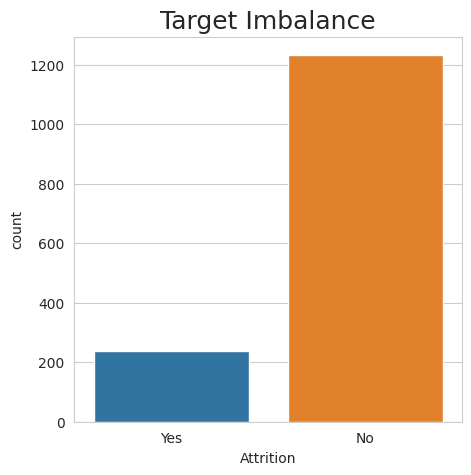

In [7]:
fig, axes = plt.subplots(figsize=(5,5))
sns.countplot(data=df, x='Attrition')
plt.title('Target Imbalance', fontsize=18)
plt.show()

Another way of showing target imbalance between 2 arbitrarly chosen variables. Target imbalance will lead that the model will have more trouble predicting 'Yes - attrition'.
For that, we might use over sampling technique like Synthetic Minority Over-sampling Technique (SMOTE) or under sampling. This will be further discussed in notebook number 04.

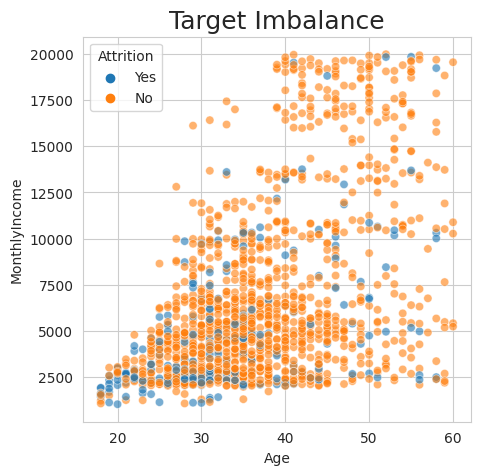

In [8]:
fig, axes = plt.subplots(figsize=(5,5))
sns.scatterplot(data=df, x="Age", y="MonthlyIncome", hue="Attrition", alpha=0.6)
plt.title('Target Imbalance', fontsize=18)
plt.show()

Check the normalized labels' frequencies for each variable to see if we need to perform Rare label encoding later. It seems that we will not need it.

In [9]:
for col in df.columns.to_list():
  print(f"{df[col].value_counts(normalize=True)} \n\n")

35    0.053061
34    0.052381
36    0.046939
31    0.046939
29    0.046259
32    0.041497
30    0.040816
33    0.039456
38    0.039456
40    0.038776
37    0.034014
27    0.032653
28    0.032653
42    0.031293
39    0.028571
45    0.027891
41    0.027211
26    0.026531
44    0.022449
46    0.022449
43    0.021769
50    0.020408
25    0.017687
24    0.017687
49    0.016327
47    0.016327
55    0.014966
51    0.012925
53    0.012925
48    0.012925
54    0.012245
52    0.012245
22    0.010884
56    0.009524
23    0.009524
58    0.009524
21    0.008844
20    0.007483
59    0.006803
19    0.006122
18    0.005442
60    0.003401
57    0.002721
Name: Age, dtype: float64 


No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64 


Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: BusinessTravel, dtype: float64 


691     0.004082
408     0.003401
530     0.003401
1329    0.003401
1082    0.003401
          ...   
650     0.000680
279     0.

## Data preparation

Here we will:
1. Drop columns
2. Change attrition data type
3. Perform one hot encoding to transform categorical data to numerical (needed for correlation)

Let's drop the columns:
* `DailyRate`, `HourlyRate` and `MonthlyRate` as they are ambiguous, we will use the monthly income instead
* `EmployeeCount`, `Over18` and `StandardHours` as they have one value i.e. constant
* `EmployeeNumber` (or ID) as it shall not affect the statistics

In [10]:
try:
    df = df.drop(['DailyRate','EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate', 'StandardHours', 'Over18'], axis=1)
except KeyError:
    pass

df.shape

(1470, 28)

Change the target from categorical to numerical to prepare for correlation analysis

In [11]:
df['Attrition'] = df['Attrition'].replace({"Yes":1, "No":0})
df['Attrition'].dtype

dtype('int64')

Perform the encoding

In [1]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=True)
df_ohe = encoder.fit_transform(df)
print(df_ohe.shape)
df_ohe.head(3)

NameError: name 'df' is not defined

In [13]:
df_ohe.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Rarely', 'BusinessTravel_Travel_Frequently',
       'Department_Sales', 'Department_Research & Development',
       'EducationField_Life Sciences', 'EducationField_Other',
       'EducationField_Medical', 'EducationField_Marketing',
       'EducationField_Technical Degree', 'Gender_Female',
       'JobRole_Sales Executive', 'JobRole_Research Scientist',
       'JobRole_Laboratory Technician', 'JobRole_Manufacturing Director',
       'JobRole_Healthcare Representative', 'JobRole_Manager',
       'JobRol

## Correlation analysis

We perform the correlation analysis with Spearman and Pearson methods to understand how Attrion correlates to other features.

### Spearman method

Spearman correlation measures the monotonic relationship between two variables

In [14]:
corr_spearman = df_ohe.corr(method='spearman')['Attrition'].sort_values(key=abs, ascending=False)[1:].head(10)
df_spearman = corr_spearman.to_frame()
print(df_spearman)
spearman_corr_variables = df_spearman.index.to_list()
print(f'10 Highest correlated variables to Attrition according Spearman method are {spearman_corr_variables}')

                      Attrition
OverTime_Yes           0.246118
TotalWorkingYears     -0.199002
MonthlyIncome         -0.198305
YearsAtCompany        -0.190419
JobLevel              -0.190370
YearsInCurrentRole    -0.180623
MaritalStatus_Single   0.175419
YearsWithCurrManager  -0.175355
StockOptionLevel      -0.172296
Age                   -0.171214
10 Highest correlated variables to Attrition according Spearman method are ['OverTime_Yes', 'TotalWorkingYears', 'MonthlyIncome', 'YearsAtCompany', 'JobLevel', 'YearsInCurrentRole', 'MaritalStatus_Single', 'YearsWithCurrManager', 'StockOptionLevel', 'Age']


We can also plot the heatmap to confirm this finding

In [15]:
def heatmap_corr(data, threshold):
    """
    plots the heatmap - this function was adopted from EDA tools lesson
    Arguments:
      - data : dataframe
      - threshold: threshold for correlation to show on plot
    """
    # create the mask for the upper diagonal and
    # show only values greater than the threshold
    mask = np.zeros_like(data, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    mask[abs(data) < threshold] = True

    # we plot the heatmap as usual
    fig, axes = plt.subplots(figsize=(16,8))
    sns.heatmap(data=data, annot=True, xticklabels=True, yticklabels=True,
                mask=mask, cmap='viridis', annot_kws={"size": 6}, ax=axes,
                linewidth=0.5
                )
    plt.ylim(len(data.columns),0)
    plt.show()

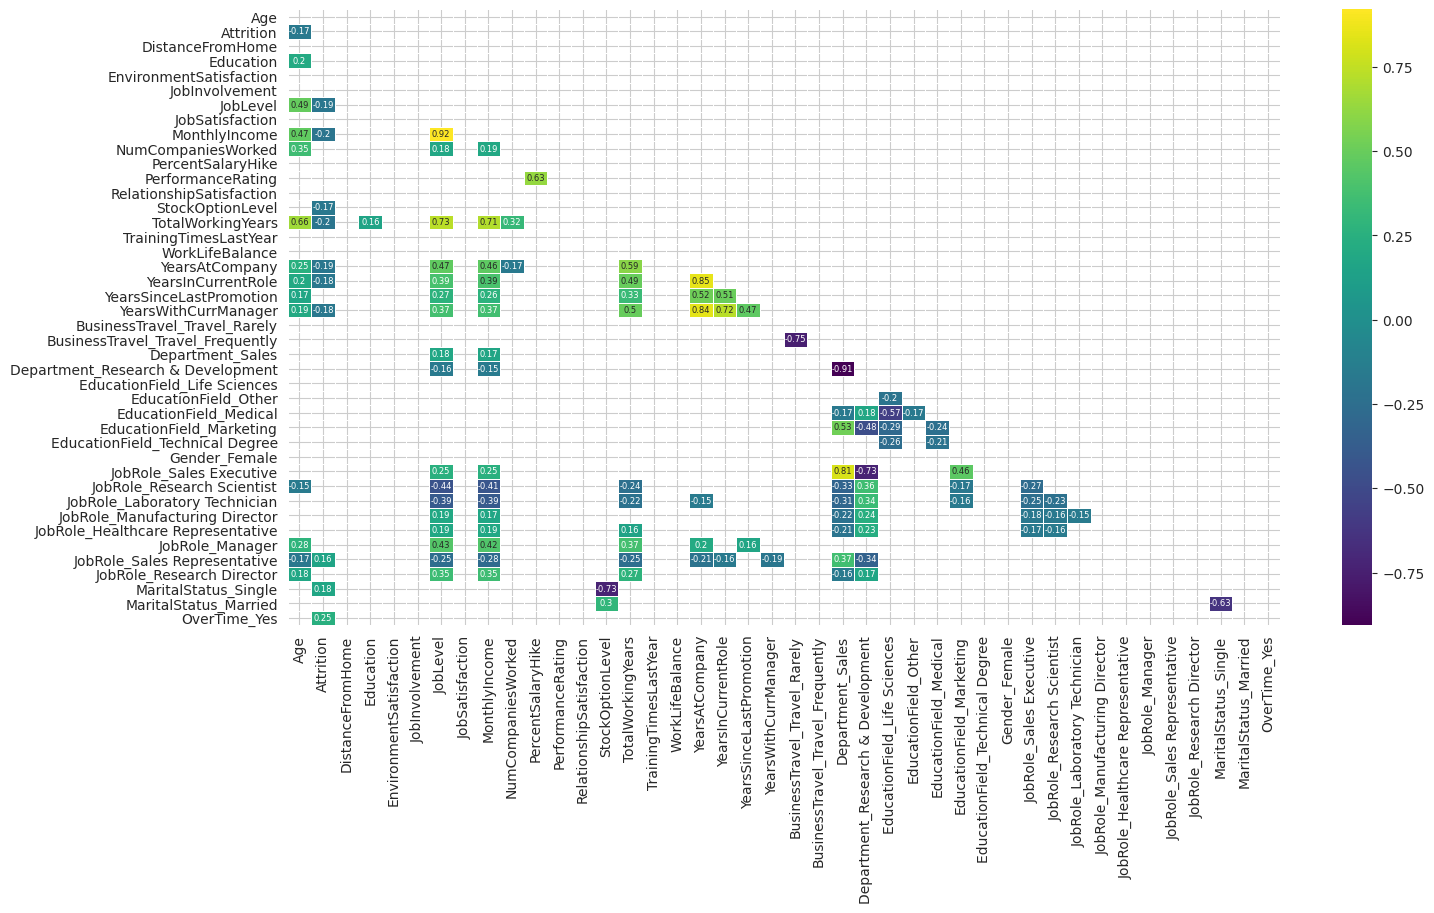

In [16]:
df_spearman = df_ohe.corr(method='spearman')
heatmap_corr(data= df_spearman, threshold=0.15)

Just out of curiosity, we can increase the threshold to see the strongest correlations within other features.

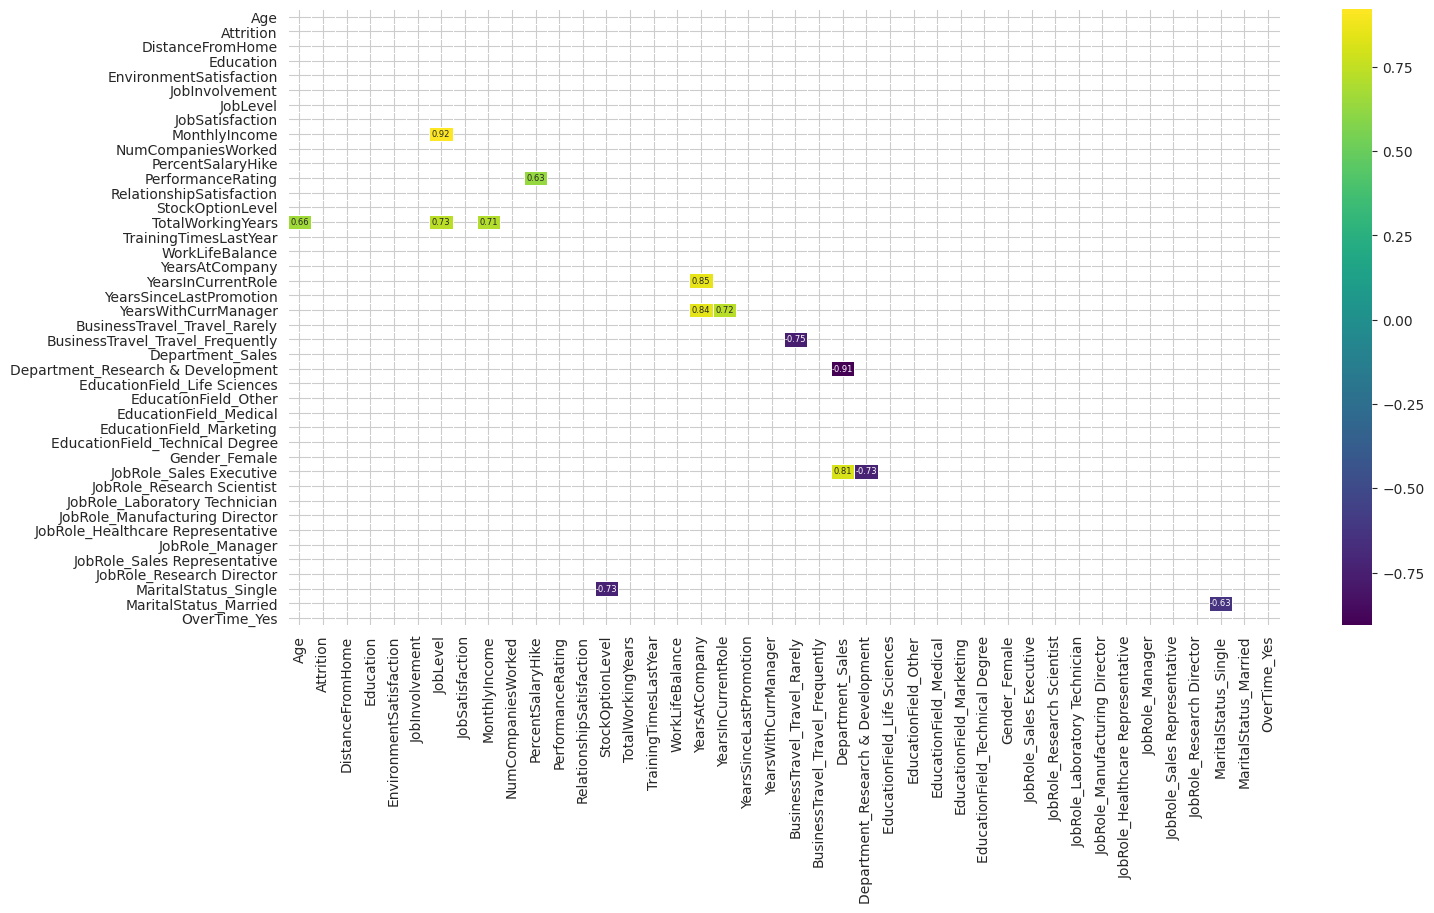

In [17]:
heatmap_corr(data= df_spearman, threshold=0.6)

We observe the following strong correlations:
* Job level, age and monthly income are positively correlated with total working years 
* Salary hikes are positively correlated to performance rating, which is logical
The strongest correlations on the correlation map are:
* Job level and monthly income (strong positive correlation)
* An employee who spends many years at the company will probably spend many years with the current manager in the current role

Note, there are other correlations, which are either redundant (like travel rarely is negatively correlated to travel frequently) due to the use of the encoder, or are not so informative (like to be sales executive you have to be in sales department).

### Pearson method

Assumes change at a constant rate. The correlation coefficient measures the **linear** relationship between two numerical variables

In [18]:
corr_pearson = df_ohe.corr(method='pearson')['Attrition'].sort_values(key=abs, ascending=False)[1:].head(10)
df_pearson = corr_pearson.to_frame()
print(df_pearson)
pearson_corr_variables = df_pearson.index.to_list()
print(f'10 Highest correlated variables to Attrition according Pearson method are {pearson_corr_variables}')

                              Attrition
OverTime_Yes                   0.246118
MaritalStatus_Single           0.175419
TotalWorkingYears             -0.171063
JobLevel                      -0.169105
YearsInCurrentRole            -0.160545
MonthlyIncome                 -0.159840
Age                           -0.159205
JobRole_Sales Representative   0.157234
YearsWithCurrManager          -0.156199
StockOptionLevel              -0.137145
10 Highest correlated variables to Attrition according Pearson method are ['OverTime_Yes', 'MaritalStatus_Single', 'TotalWorkingYears', 'JobLevel', 'YearsInCurrentRole', 'MonthlyIncome', 'Age', 'JobRole_Sales Representative', 'YearsWithCurrManager', 'StockOptionLevel']


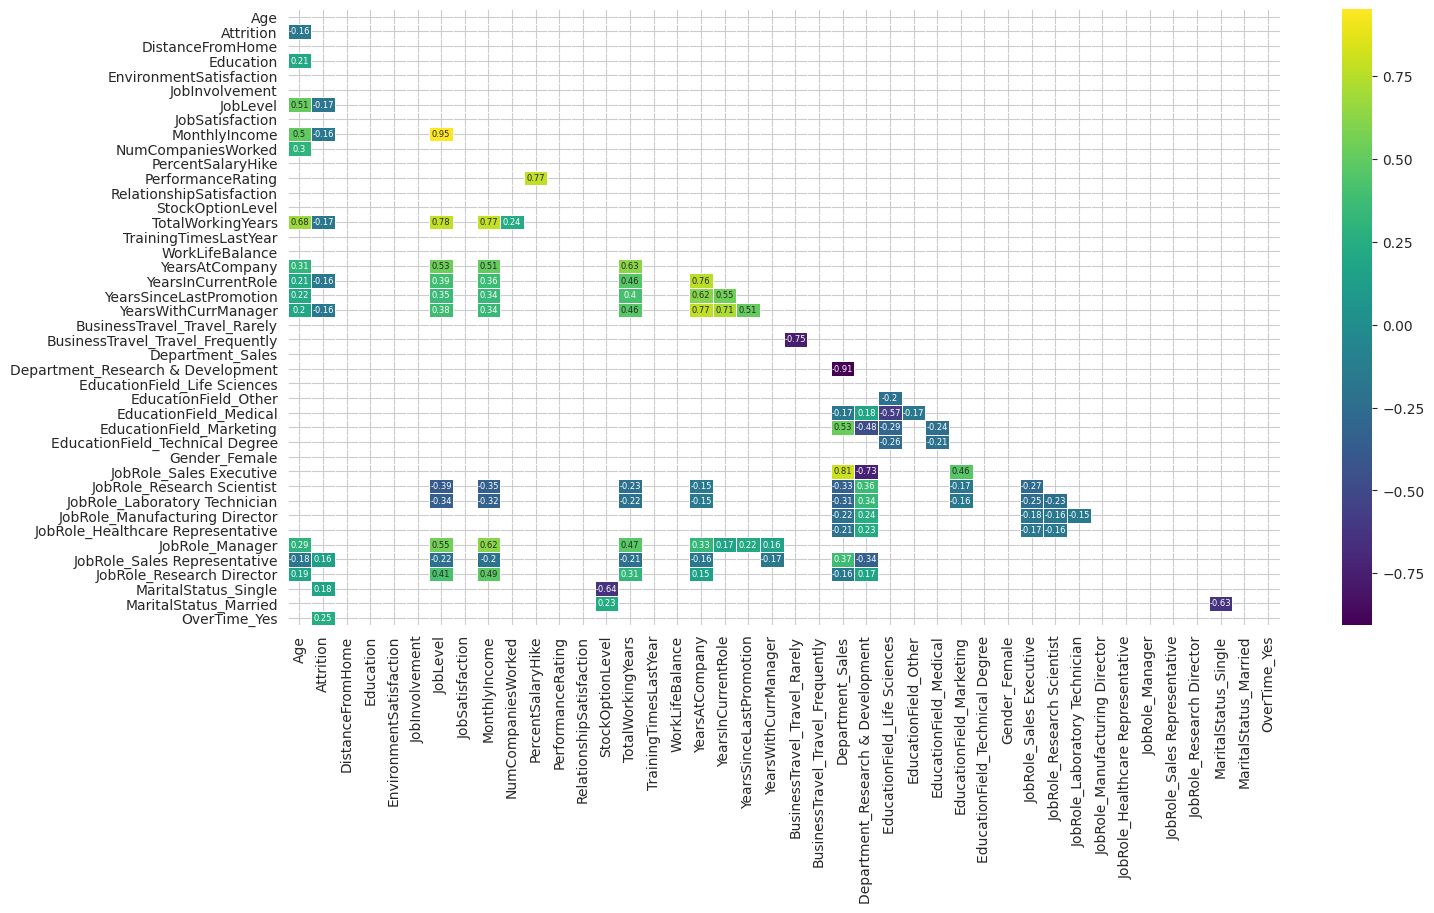

In [17]:
df_pearson = df_ohe.corr(method='pearson')
heatmap_corr(data= df_pearson, threshold=0.15)

Generally for both correlation methods, the correlation between attrition and other variables is either very weak or weak. We will consider the highest 10 correlation variables from both methods.

In [19]:
print(f'Pearson method showed {set(pearson_corr_variables) - set(spearman_corr_variables)} is important but Spearman not!')
print(f'Spearman method showed {set(spearman_corr_variables) - set(pearson_corr_variables)} is important but Pearson not!')
vars_to_consider = set(pearson_corr_variables + spearman_corr_variables)
print(f'We will consider a combination of {len(vars_to_consider)} unique variables: {vars_to_consider}')

Pearson method showed {'JobRole_Sales Representative'} is important but Spearman not!
Spearman method showed {'YearsAtCompany'} is important but Pearson not!
We will consider a combination of 11 unique variables: {'MonthlyIncome', 'JobLevel', 'YearsAtCompany', 'YearsWithCurrManager', 'MaritalStatus_Single', 'YearsInCurrentRole', 'StockOptionLevel', 'Age', 'JobRole_Sales Representative', 'OverTime_Yes', 'TotalWorkingYears'}


Have a look on the distribution of our main numerical variables. It seems that only 'Age' variable is normally distributed while the remaining variables are either skewed or Poisson-distributed. We will cover this in more detail in the feature engineering notebook.

## Distribution of the selected variables

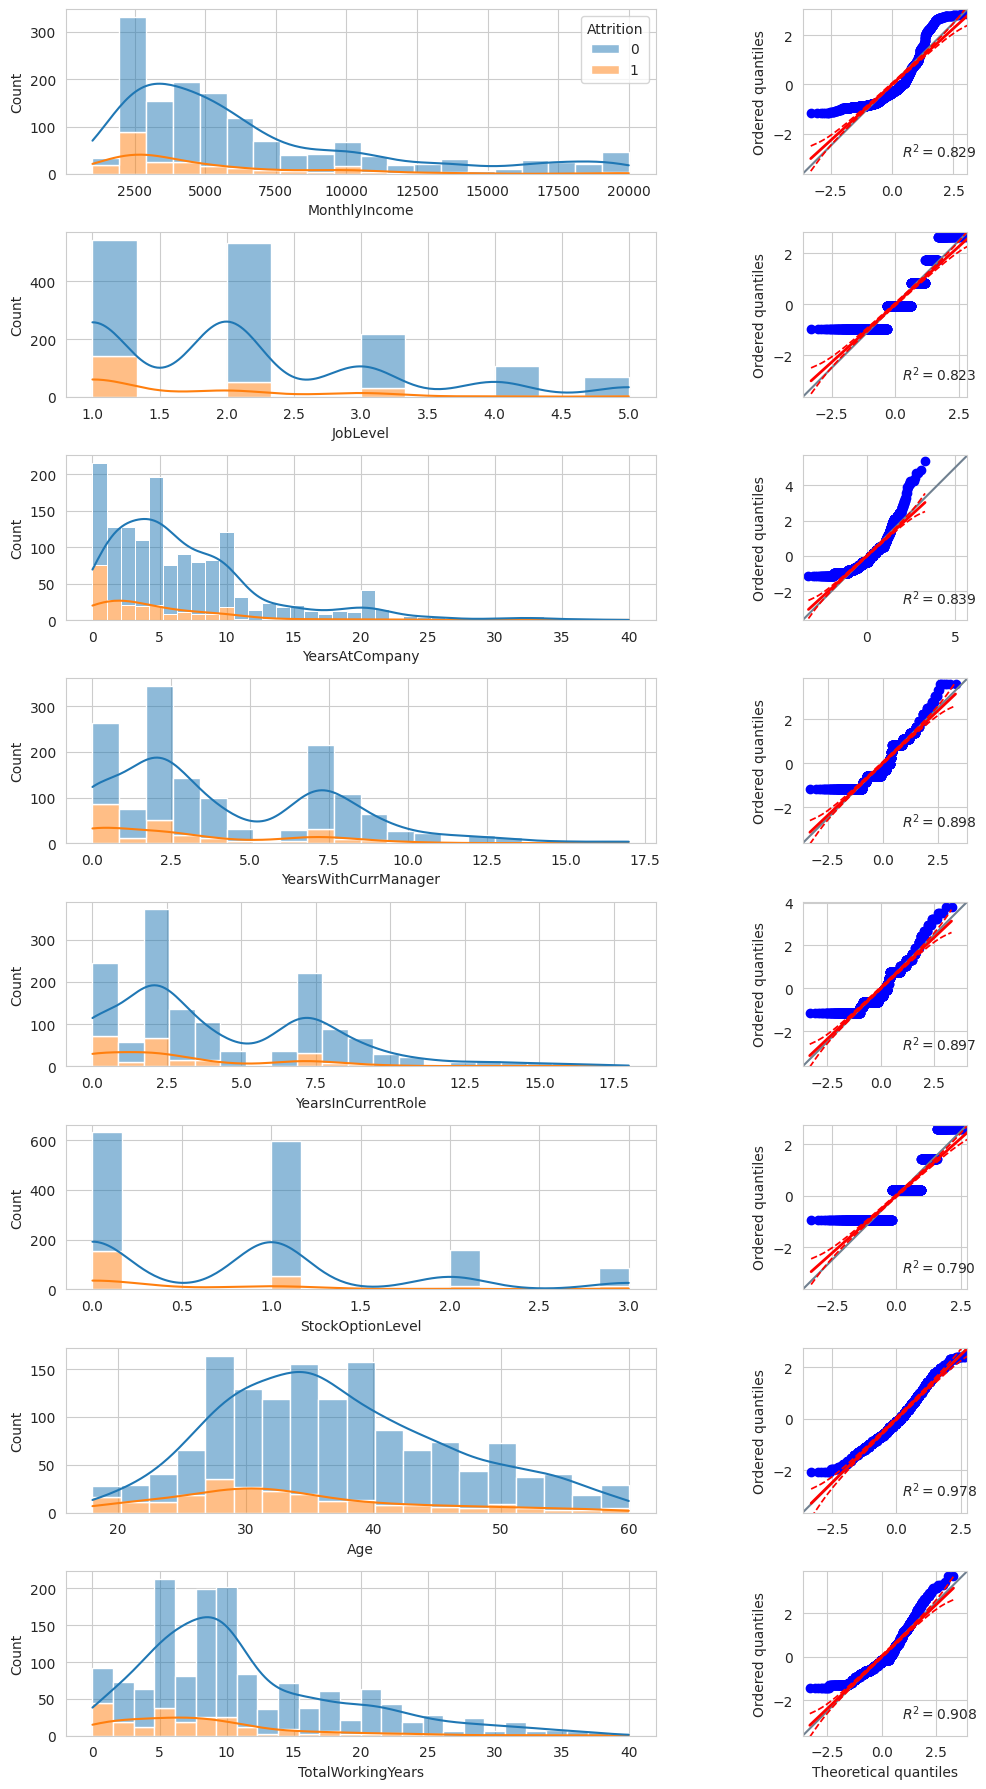

In [20]:
import pingouin as pg

# There are 8 numerical variables within these 11 variables to consider
num_vars = 8
fig, axes = plt.subplots(num_vars, 2, figsize=(12,18), width_ratios = [1, 1])

a = 0
for col in vars_to_consider:
    if len(df_ohe[col].unique()) > 2:
        if a==0:
            sns.histplot(data=df_ohe, x=col, hue='Attrition', ax=axes[0,0], kde=True, multiple="stack")
            qqplot = pg.qqplot(df_ohe[col], dist='norm', ax=axes[0, 1])
            qqplot.set(xlabel=None)
        elif a>0 and a<num_vars-1:
            plot = sns.histplot(data=df_ohe, x=col, hue='Attrition', ax=axes[a, 0], kde=True, legend=False, multiple="stack")
            qqplot = pg.qqplot(df_ohe[col], dist='norm', ax=axes[a, 1])
            qqplot.set(xlabel=None)
        else:
            plot = sns.histplot(data=df_ohe, x=col, hue='Attrition', ax=axes[a, 0], kde=True, legend=False, multiple="stack")
            pg.qqplot(df_ohe[col], dist='norm', ax=axes[a, 1])

        a += 1

plt.tight_layout()
plt.show()

## Predictive Power Score

A complementary analysis to the correlation level study. We can detect linear or non-linear relationships between variables using predictive power score (PPS). It works also on asymmetric relationships. We don't need to encode categorical variables.

First, we return to our original dataset not the one where one hot encoder was peroformed on, but this time we consider only the variables with highest correlation levels to attrition.

Important: The PPS was also performed on all numerical variables of the `df` dataset. However, this did not change from using only the selected variables from the correlation study. There wasn't any more knowledge obtained on attrition i.e. the predictive power of variables on attririon was the same. Therefore, here we show only the variables with highest correlation levels to fit the plots in the screen and make them more readable.

In [21]:
vars_to_consider_from_df = ['TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager', 'OverTime', 'YearsInCurrentRole', 'JobLevel', 'MaritalStatus', 'JobRole', 'Age', 'MonthlyIncome', 'StockOptionLevel']
df_selected = df.filter(list(vars_to_consider_from_df))
df_selected['Attrition'] = df['Attrition']
df_selected

TotalWorkingYears  YearsAtCompany  YearsWithCurrManager OverTime  \
0                     8               6                     5      Yes   
1                    10              10                     7       No   
2                     7               0                     0      Yes   
3                     8               8                     0      Yes   
4                     6               2                     2       No   
...                 ...             ...                   ...      ...   
1465                 17               5                     3       No   
1466                  9               7                     7       No   
1467                  6               6                     3      Yes   
1468                 17               9                     8       No   
1469                  6               4                     2       No   

      YearsInCurrentRole  JobLevel MaritalStatus                    JobRole  \
0                      4         2        Single            Sales Executive   
1                      7         2       Married         Research Scientist   
2                      0         1        Single      Laboratory Technician   
3                      7         1       Married         Research Scientist   
4                      2         1       Married      Laboratory Technician   
...                  ...       ...           ...                        ...   
1465                   2         2       Married      Laboratory Technician   
1466                   7         3       Married  Healthcare Representative   
1467                   2         2       Married     Manufacturing Director   
1468                   6         2       Married            Sales Executive   
1469                   3         2       Married      Laboratory Technician   

      Age  MonthlyIncome  StockOptionLevel  Attrition  
0      41           5993                 0          1  
1      49           5130                 1          0  
2      37           2090                 0          1  
3      33           2909                 0          0  
4      27           3468                 1          0  
...   ...            ...               ...        ...  
1465   36           2571                 1          0  
1466   39           9991                 1          0  
1467   27           6142                 1          0  
1468   49           5390                 0          0  
1469   34           4404                 0          0  

[1470 rows x 12 columns]

Next, we perform a pairplot to visualize the relationships among the variables. Note that the categorical variables are dropped since we don't use the encoded dataset.

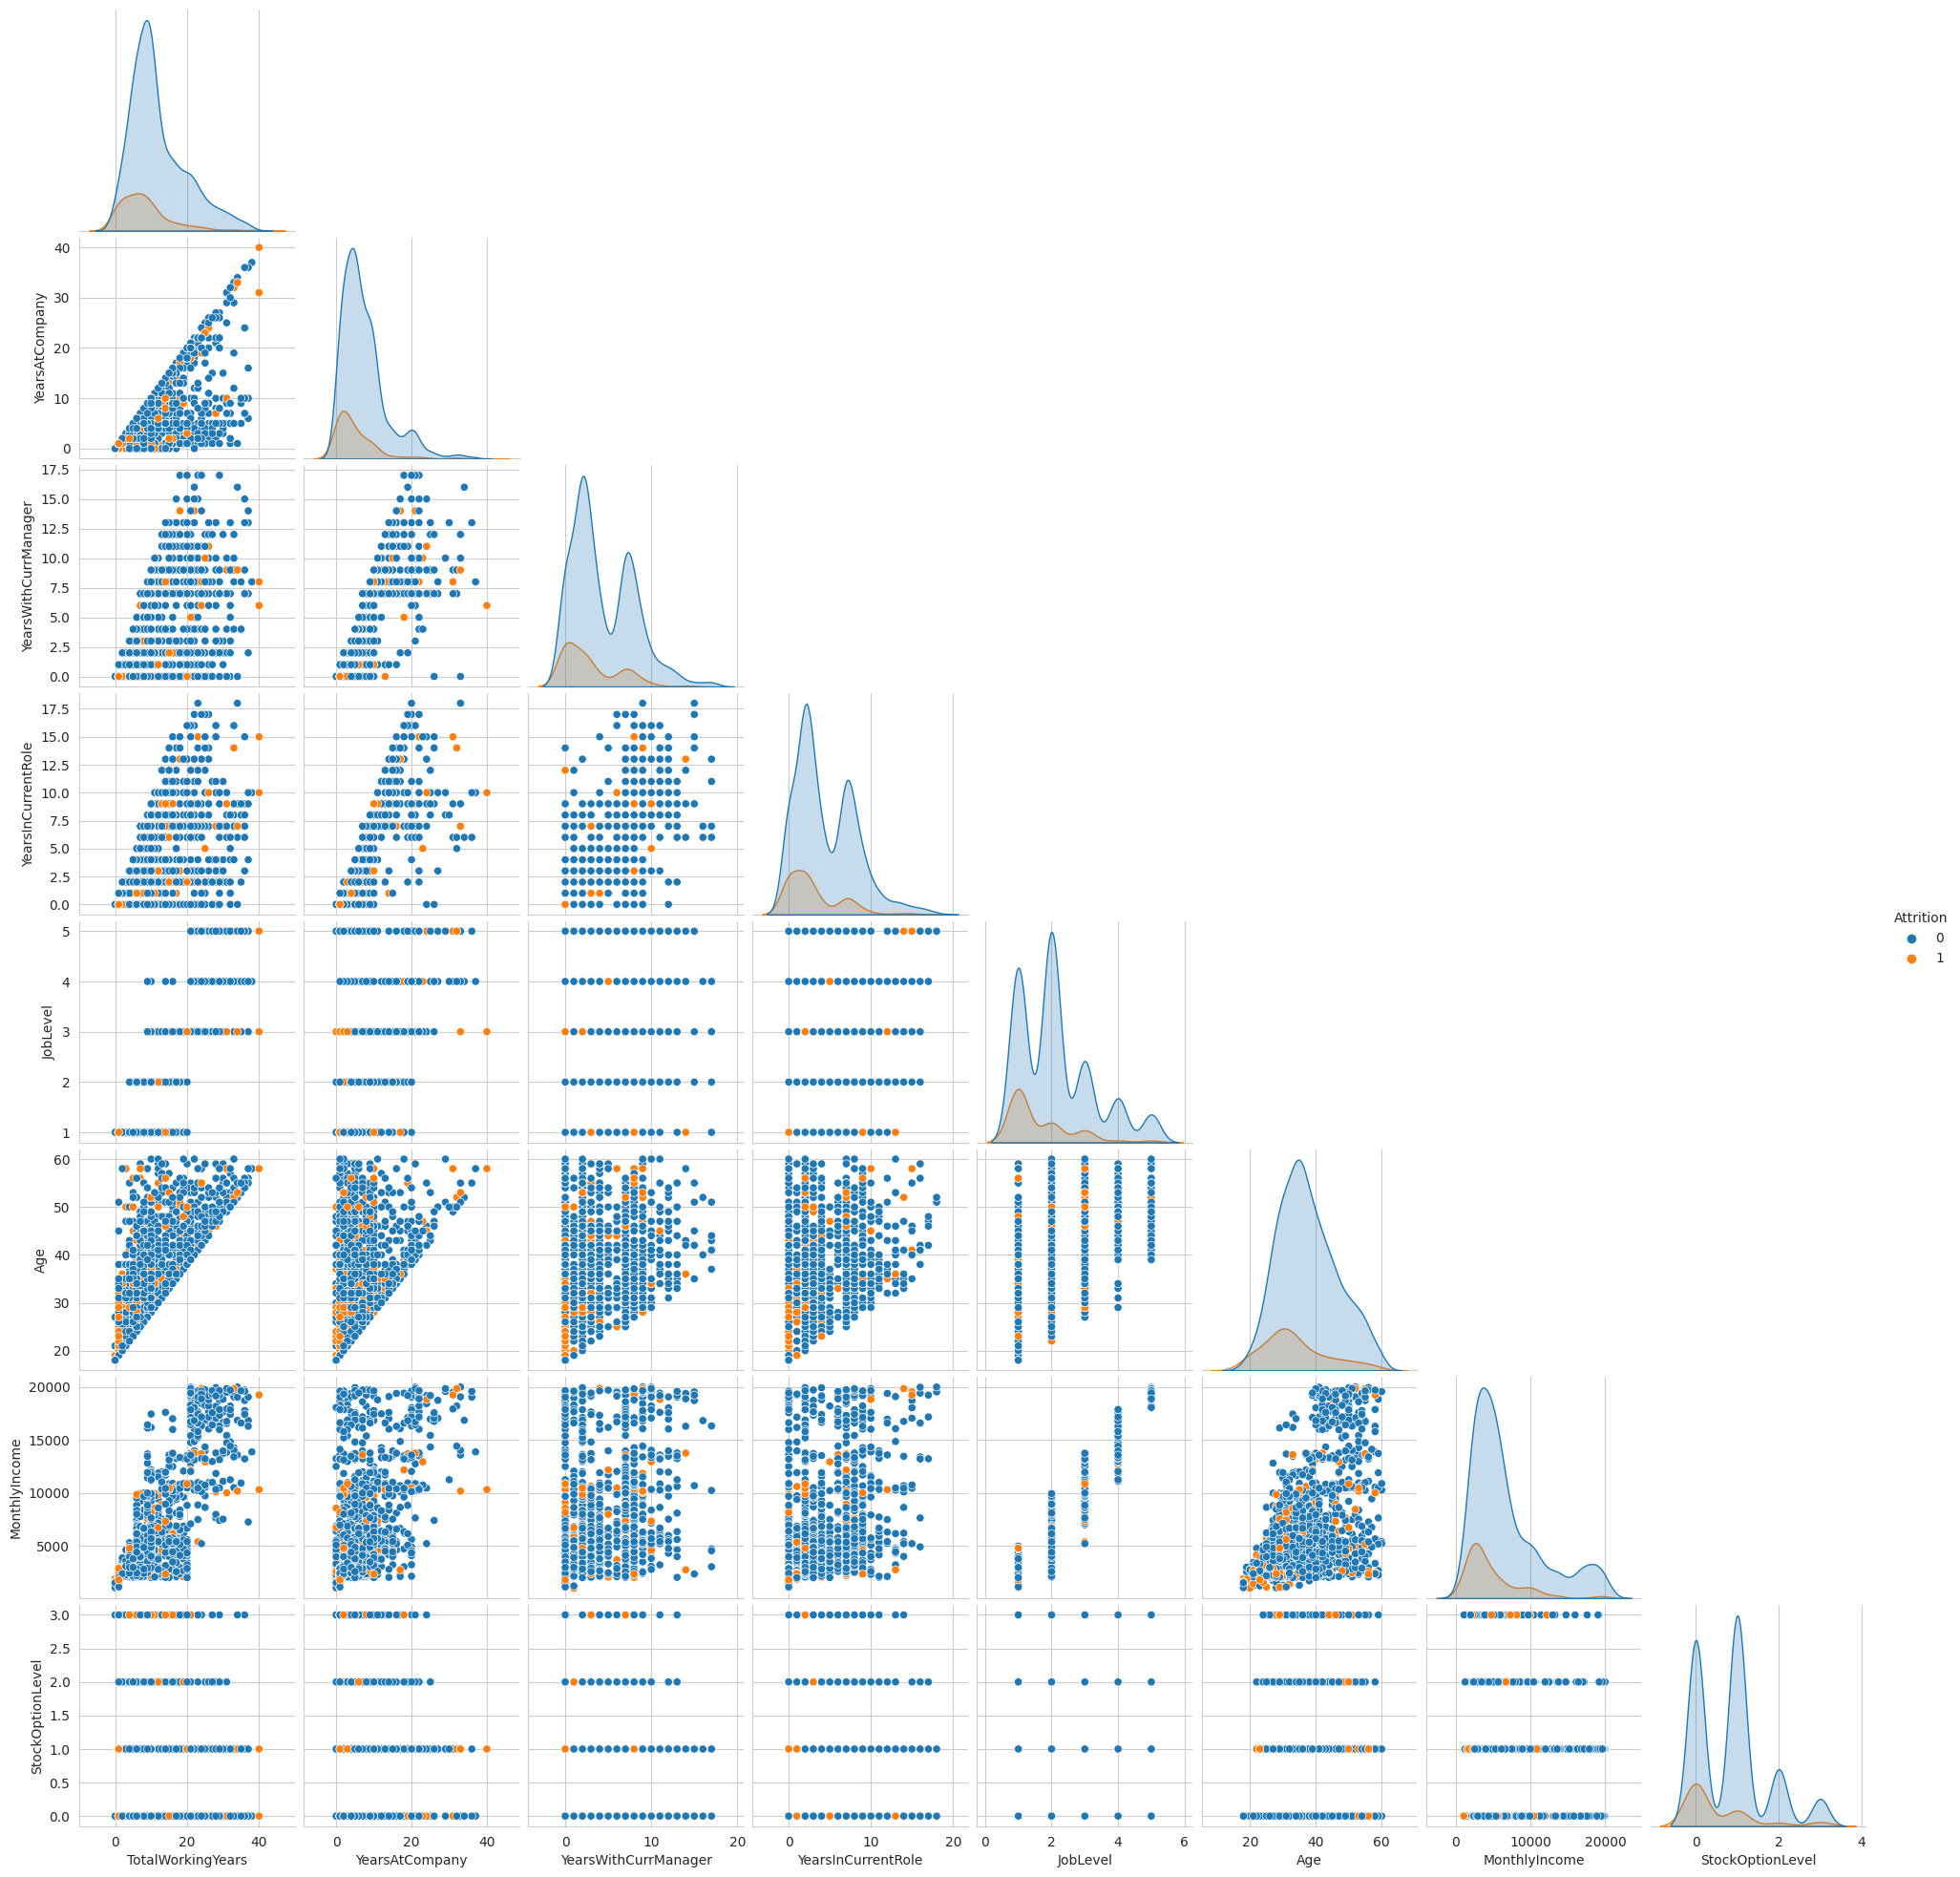

In [22]:
sns.pairplot(data=df_selected, hue='Attrition', corner=True)

We calculate the PPS matrix

In [23]:
import ppscore as pps
pps_matrix_raw = pps.matrix(df_selected)
pps_matrix_raw

x                     y   ppscore            case  \
0    TotalWorkingYears     TotalWorkingYears  1.000000  predict_itself   
1    TotalWorkingYears        YearsAtCompany  0.238820      regression   
2    TotalWorkingYears  YearsWithCurrManager  0.179305      regression   
3    TotalWorkingYears              OverTime  0.000000  classification   
4    TotalWorkingYears    YearsInCurrentRole  0.193028      regression   
..                 ...                   ...       ...             ...   
139          Attrition               JobRole  0.000000  classification   
140          Attrition                   Age  0.004621      regression   
141          Attrition         MonthlyIncome  0.000000      regression   
142          Attrition      StockOptionLevel  0.000000      regression   
143          Attrition             Attrition  1.000000  predict_itself   

     is_valid_score               metric  baseline_score  model_score  \
0              True                 None        0.000000     1.000000   
1              True  mean absolute error        4.254422     3.238383   
2              True  mean absolute error        2.871429     2.356567   
3              True          weighted F1        0.604082     0.596829   
4              True  mean absolute error        2.886395     2.329240   
..              ...                  ...             ...          ...   
139            True          weighted F1        0.155782     0.107007   
140            True  mean absolute error        7.330612     7.296739   
141            True  mean absolute error     3347.098639  3597.208479   
142            True  mean absolute error        0.652381     0.659699   
143            True                 None        0.000000     1.000000   

                        model  
0                        None  
1     DecisionTreeRegressor()  
2     DecisionTreeRegressor()  
3    DecisionTreeClassifier()  
4     DecisionTreeRegressor()  
..                        ...  
139  DecisionTreeClassifier()  
140   DecisionTreeRegressor()  
141   DecisionTreeRegressor()  
142   DecisionTreeRegressor()  
143                      None  

[144 rows x 9 columns]

Filter the x, y and ppscore and do a pivot table from these values

In [24]:
pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')
pps_matrix

x                          Age  Attrition  JobLevel   JobRole  MaritalStatus  \
y                                                                              
Age                   1.000000   0.004621  0.151079  0.098044       0.000000   
Attrition             0.000000   1.000000  0.000000  0.000000       0.000000   
JobLevel              0.060271   0.000000  1.000000  0.442274       0.000000   
JobRole               0.027073   0.000000  0.152852  1.000000       0.000000   
MaritalStatus         0.003275   0.042156  0.000000  0.000000       1.000000   
MonthlyIncome         0.074078   0.000000  0.716153  0.533532       0.000000   
OverTime              0.010016   0.247280  0.000000  0.000000       0.000000   
StockOptionLevel      0.000000   0.000000  0.000000  0.000000       0.438208   
TotalWorkingYears     0.219621   0.000000  0.360958  0.214804       0.000000   
YearsAtCompany        0.000000   0.000000  0.109648  0.050431       0.000000   
YearsInCurrentRole    0.000000   0.000000  0.096119  0.036060       0.000000   
YearsWithCurrManager  0.000000   0.000000  0.071858  0.025583       0.000000   

x                     MonthlyIncome  OverTime  StockOptionLevel  \
y                                                                 
Age                        0.000000       0.0          0.000000   
Attrition                  0.000000       0.0          0.000000   
JobLevel                   0.803810       0.0          0.000000   
JobRole                    0.204606       0.0          0.000000   
MaritalStatus              0.004100       0.0          0.428054   
MonthlyIncome              1.000000       0.0          0.000000   
OverTime                   0.001934       1.0          0.000000   
StockOptionLevel           0.000000       0.0          1.000000   
TotalWorkingYears          0.154056       0.0          0.000000   
YearsAtCompany             0.000000       0.0          0.000000   
YearsInCurrentRole         0.000000       0.0          0.000000   
YearsWithCurrManager       0.000000       0.0          0.000000   

x                     TotalWorkingYears  YearsAtCompany  YearsInCurrentRole  \
y                                                                             
Age                            0.283342        0.047031            0.003239   
Attrition                      0.000000        0.000000            0.000000   
JobLevel                       0.419799        0.097095            0.018759   
JobRole                        0.128293        0.057393            0.063457   
MaritalStatus                  0.000000        0.000000            0.000000   
MonthlyIncome                  0.412895        0.120146            0.032487   
OverTime                       0.000000        0.000000            0.015786   
StockOptionLevel               0.000000        0.000000            0.000000   
TotalWorkingYears              1.000000        0.247360            0.088266   
YearsAtCompany                 0.238820        1.000000            0.448650   
YearsInCurrentRole             0.193028        0.589429            1.000000   
YearsWithCurrManager           0.179305        0.592115            0.440734   

x                     YearsWithCurrManager  
y                                           
Age                               0.000000  
Attrition                         0.000000  
JobLevel                          0.000000  
JobRole                           0.028135  
MaritalStatus                     0.000000  
MonthlyIncome                     0.007775  
OverTime                          0.000000  
StockOptionLevel                  0.000000  
TotalWorkingYears                 0.078722  
YearsAtCompany                    0.444672  
YearsInCurrentRole                0.434994  
YearsWithCurrManager              1.000000

Plot the heatmap

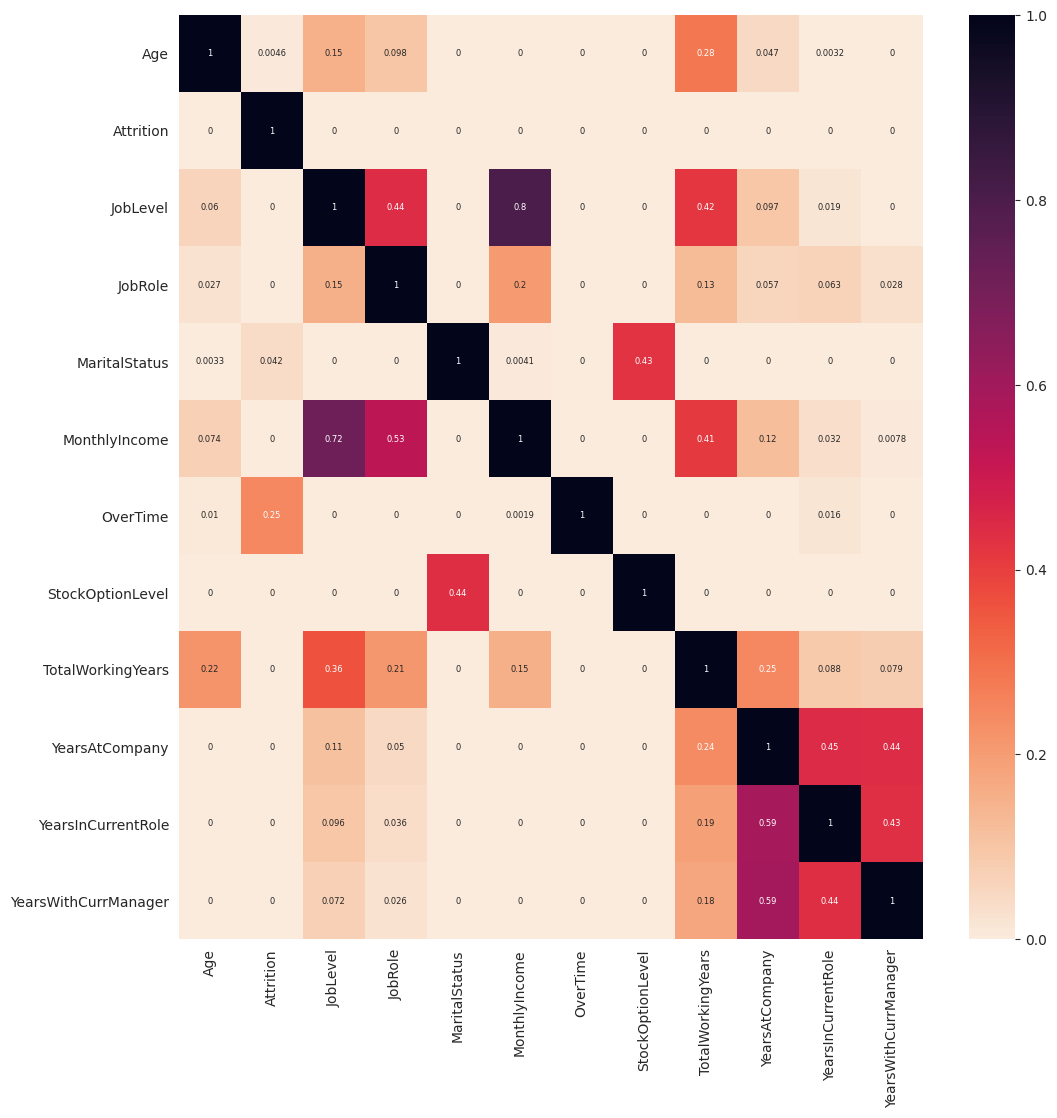

In [25]:
fig, ax = plt.subplots(figsize=(12,12))
heatmap = sns.heatmap(pps_matrix, annot=True, annot_kws={"size": 6},
                cmap='rocket_r', linecolor='lightgrey')
heatmap.set(xlabel=None, ylabel=None)
plt.show()

From the above matrix, we can't draw any conclusions on how strong/weak can variables predict Attrition. PPS was not very useful in this study.

---

## Save the dataset

In [26]:
try:
  os.makedirs(name='outputs/datasets/cleaned')
except Exception as e:
  print(e)

df.to_csv(f"outputs/datasets/cleaned/DatasetCleaned.csv", index=False)

[Errno 17] File exists: 'outputs/datasets/cleaned'


## Split the dataset and save

In [29]:
from sklearn.model_selection import train_test_split
TrainSet, TestSet, _, __ = train_test_split(
                                        df,
                                        df['Attrition'],
                                        test_size=0.2,
                                        random_state=0)

print(f"TrainSet shape: {TrainSet.shape} \nTestSet shape: {TestSet.shape}")

TrainSet shape: (1176, 28) 
TestSet shape: (294, 28)


In [30]:
TrainSet.to_csv("outputs/datasets/cleaned/TrainSetCleaned.csv", index=False)
TestSet.to_csv("outputs/datasets/cleaned/TestSetCleaned.csv", index=False)

---

# Conclusions

In this notebook, the following conclusions can be drawn:
* `TotalWorkingYears`, `YearsAtCompany`, `YearsWithCurrManager`, `OverTime`, `YearsInCurrentRole`, `JobLevel`, `MaritalStatus`, `JobRole`, `Age`, `MonthlyIncome`, `StockOptionLevel` are the main variables affecting attrition according to the correlation analysis
* Except for `MaritalStatus`, `JobRole` and `Overtime`, the correlation is negative. Meaning that as the variable increases, attrition decreases and vice versa.
* From the PPS analysis, attrition does not show predictive power with other variables.

# Next Steps

In the next notebook, an exploratory data analysis will be carried out using Pandas profiling and correlation studies.